In [1]:
import os
import sys
import json
import openai
import evaluate
import pandas as pd
from datasets import Dataset
from dotenv import load_dotenv
from ragas import evaluate
from ragas.metrics import AnswerSimilarity
from ragas

/Users/shaswatamitra/anaconda3/envs/parcvres311/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/shaswatamitra/anaconda3/envs/parcvres311/lib/python3.12/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/shaswatamitra/anaconda3/envs/parcvres311/lib/python3.12/site-packages/ragas/metrics/__init__.py:1: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from l

In [ ]:
load_dotenv()
os.environ["OPENAI_API_KEY"] = 'OPEN_AI_KEY'

In [3]:
ground_truth_file_path = '/Users/shaswatamitra/Desktop/Files/Work/Projects/github/Contextual_CTI/data/LocalIntel_final_eval_Dataset.xlsx'

In [4]:
df = pd.read_excel(ground_truth_file_path)

In [5]:
df.head(5)

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Dependency,Version,CVE,Questions,...,gpt_35_completion,mistral_7b_completion,qwen_7b_completion,westlake_7b_completion,westseverus_7b_completion,llama_7b_completions,prometheus_7b_completions,llama_31_8b_completions,mistral_nemo_minitron_8b_completions,gpt_4o_completions
0,0,0,0,0,0,0,Langchain,0.0.194,CVE-2023-38896,Considering the use of LangChain's chains for ...,...,The global_knowledge and local_knowledge do no...,\nThe information provided indicates a vulnera...,The LangChain chains used in the chatbot appli...,\nThe global_knowledge provides information ab...,"Given the global_knowledge, a vulnerability ex...",\nBased on the information provided in the glo...,\nThe given threat or vulnerability report hig...,An issue in LangChain v.0.0.194 and before all...,The LangChain's chains used for implementing ...,The application's use of LangChain for impleme...
1,1,1,1,1,1,1,Langchain,0.0.194,CVE-2023-38896,How critical is the langchain vulnerability in...,...,\nThe langchain vulnerability is highly critic...,"\nFrom the global_knowledge provided, a remote...",The langchain vulnerability in Harrison Chase ...,\nThe given threat or vulnerability report hig...,The given threat in Harrison Chase langchain e...,Based on the information provided in global_k...,\nThe identified vulnerability in Harrison Cha...,The vulnerability in Harrison Chase langchain ...,The langchain vulnerability is critical in te...,The LangChain vulnerability in versions v.0.0....
2,2,2,2,2,2,2,StreamLit,0.63.0,CVE-2023-27494,What potential consequences could arise from t...,...,\nIf the XSS vulnerability in Streamlit versio...,\nAn attacker could inject malicious scripts i...,The potential consequences from the exploitati...,\nIn the exploitation of the XSS vulnerability...,"In the given context, the chatbot application ...",\nBased on the information provided in global_...,\nExploitation of the XSS vulnerability in Str...,More information is required to answer the que...,The potential consequences of the XSS vulnera...,The exploitation of the XSS vulnerability in S...
3,3,3,3,3,3,3,StreamLit,0.63.0,CVE-2023-27494,What actions can an attacker take advantage of...,...,\nAn attacker could trick a user into visiting...,\nAn attacker could create a malicious URL wit...,An attacker could exploit the cross-site scrip...,\nAn attacker can take advantage of the vulner...,"An attacker, leveraging the cross-site scripti...",\nBased on the information provided in the glo...,\nAn attacker taking advantage of the exploite...,An attacker can craft a malicious URL with Jav...,An attacker can craft a malicious URL with Ja...,An attacker could craft a malicious URL with J...
4,4,4,4,4,4,4,Docker,3.1,CVE-2023-0626,How does the vulnerability in Docker Desktop p...,...,The vulnerability in Docker Desktop potentiall...,\nGiven the information provided in global_kno...,The vulnerability in Docker Desktop before 4.1...,\nThe given vulnerability in Docker Desktop be...,\nThe vulnerability in Docker Desktop before 4...,\nThe vulnerability in Docker Desktop could po...,\nThe vulnerability in Docker Desktop before 4...,More information is required to answer the que...,The vulnerability in Docker Desktop before ve...,The vulnerability in Docker Desktop before ver...


In [6]:
df.describe()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,28.500000,28.500000,28.500000,28.500000,28.500000,30.000000
std,16.886879,16.886879,16.886879,16.886879,16.886879,18.178453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.250000,14.250000,14.250000,14.250000,14.250000,14.250000
50%,28.500000,28.500000,28.500000,28.500000,28.500000,30.500000
75%,42.750000,42.750000,42.750000,42.750000,42.750000,45.750000
max,57.000000,57.000000,57.000000,57.000000,57.000000,60.000000


In [13]:
ground_truth_list = list(df['Ground_truth'])

In [14]:
ground_truth_list[0]

"The vulnerability in LangChain version 0.0.194, allowing remote code execution via specific functions such as from_math_prompt and from_colored_object_prompt, directly affects the security of LangChain's chains used in the ToyChat application. Exploitation of these chains could lead to unauthorized code execution, posing severe security risks such as data breaches or system compromise. Prompt action, including patching and implementing additional security measures, is necessary to mitigate these risks effectively."

In [10]:
gpt_35_completions = list(df['gpt_35_completion'])

In [22]:
mistral_7b_completion = list(df['mistral_7b_completion'])

In [23]:
qwen_7b_completion = list(df['qwen_7b_completion'])

In [24]:
westlake_7b_completion = list(df['westlake_7b_completion'])

In [25]:
westseverus_7b_completion = list(df['westseverus_7b_completion'])

In [26]:
llama_7b_completions = list(df['llama_7b_completions'])

In [27]:
prometheus_7b_completions = list(df['prometheus_7b_completions'])

In [28]:
llama_31_8b_completions = list(df['llama_31_8b_completions'])

In [29]:
mistral_nemo_minitron_8b_completions = list(df['mistral_nemo_minitron_8b_completions'])

In [30]:
gpt_4o_completions = list(df['gpt_4o_completions'])

In [108]:
prediction_list = gpt_4o_completions

In [109]:
data_samples = {
        'answer': prediction_list,
        'ground_truth': ground_truth_list
    }


In [110]:
dataset = Dataset.from_dict(data_samples)
answer_similarity = AnswerSimilarity()

result = evaluate(
    dataset,
    metrics=[
        answer_similarity,
    ],
)

Evaluating: 100%|██████████| 58/58 [00:02<00:00, 23.64it/s]


In [111]:
result_df = result.to_pandas()

In [112]:
result_df

,answer,ground_truth,answer_similarity
0,The application's use of LangChain for impleme...,The vulnerability in LangChain version 0.0.194...,0.944816
1,The LangChain vulnerability in versions v.0.0....,This LangChain vulnerability is critical due t...,0.924200
2,The exploitation of the XSS vulnerability in S...,Users of hosted Streamlit app(s) are vulnerabl...,0.946323
3,An attacker could craft a malicious URL with J...,Through the exploitation of the vulnerability ...,0.961944
4,The vulnerability in Docker Desktop before ver...,The vulnerability in Docker Desktop before ver...,0.877959
5,The remote code execution (RCE) vulnerability ...,The vulnerability in Docker Desktop before ver...,0.980656
6,The vulnerability in GitPython might impact th...,This vulnerability introduces the risk of exec...,0.945580
7,The specific scenario within the GitPython vul...,The GitPython vulnerability allows execution o...,0.931349
8,An attacker might exploit the joblib vulnerabi...,An attacker could exploit the vulnerability in...,0.968819
9,The potential risks to our chatbot application...,The presence of the vulnerability in Joblib po...,0.950137


In [113]:
result_df.describe()

,answer_similarity
count,58.000000
mean,0.910901
std,0.055734
min,0.760060
25%,0.880175
50%,0.931424
75%,0.950094
max,0.980656


In [31]:
# final_result_df = pd.DataFrame([])

In [114]:
# final_result_df['groud_truth'] = result_df['ground_truth']
final_result_df['gpt_4o_prediction'] = result_df['answer']
final_result_df['gpt_4o_score'] = result_df['answer_similarity']


In [115]:
final_result_df.columns

Index(['groud_truth', 'gpt_35_turbo_prediction', 'gpt_35_turbo_score',
       'mistral_7b_prediction', 'mistral_7b_score', 'qwen_1.5_7b_prediction',
       'qwen_1.5_7b_score', 'westlake_7b_prediction', 'westlake_7b_score',
       'westseverus_7b_prediction', 'westseverus_7b_score',
       'llama_2_7b_prediction', 'llama_2_7b_score', 'prometheus_7b_prediction',
       'prometheus_7b_score', 'llama_31_8b_prediction', 'llama_31_8b_score',
       'mistral_nemo_minitron_8b_prediction', 'mistral_nemo_minitron_8b_score',
       'gpt_4o_prediction', 'gpt_4o_score'],
      dtype='object')

In [116]:
final_result_df.head()

,groud_truth,gpt_35_turbo_prediction,gpt_35_turbo_score,mistral_7b_prediction,mistral_7b_score,qwen_1.5_7b_prediction,qwen_1.5_7b_score,westlake_7b_prediction,westlake_7b_score,westseverus_7b_prediction,...,llama_2_7b_prediction,llama_2_7b_score,prometheus_7b_prediction,prometheus_7b_score,llama_31_8b_prediction,llama_31_8b_score,mistral_nemo_minitron_8b_prediction,mistral_nemo_minitron_8b_score,gpt_4o_prediction,gpt_4o_score
0,The vulnerability in LangChain version 0.0.194...,The global_knowledge and local_knowledge do no...,0.842801,\nThe information provided indicates a vulnera...,0.936299,The LangChain chains used in the chatbot appli...,0.959327,\nThe global_knowledge provides information ab...,0.884044,"Given the global_knowledge, a vulnerability ex...",...,\nBased on the information provided in the glo...,0.933542,\nThe given threat or vulnerability report hig...,0.947073,An issue in LangChain v.0.0.194 and before all...,0.944542,The LangChain's chains used for implementing ...,0.932920,The application's use of LangChain for impleme...,0.944816
1,This LangChain vulnerability is critical due t...,\nThe langchain vulnerability is highly critic...,0.945378,"\nFrom the global_knowledge provided, a remote...",0.905207,The langchain vulnerability in Harrison Chase ...,0.933025,\nThe given threat or vulnerability report hig...,0.905175,The given threat in Harrison Chase langchain e...,...,Based on the information provided in global_k...,0.913019,\nThe identified vulnerability in Harrison Cha...,0.923486,The vulnerability in Harrison Chase langchain ...,0.890442,The langchain vulnerability is critical in te...,0.900205,The LangChain vulnerability in versions v.0.0....,0.924200
2,Users of hosted Streamlit app(s) are vulnerabl...,\nIf the XSS vulnerability in Streamlit versio...,0.939875,\nAn attacker could inject malicious scripts i...,0.880586,The potential consequences from the exploitati...,0.904656,\nIn the exploitation of the XSS vulnerability...,0.932510,"In the given context, the chatbot application ...",...,\nBased on the information provided in global_...,0.890439,\nExploitation of the XSS vulnerability in Str...,0.929816,More information is required to answer the que...,0.728998,The potential consequences of the XSS vulnera...,0.889074,The exploitation of the XSS vulnerability in S...,0.946323
3,Through the exploitation of the vulnerability ...,\nAn attacker could trick a user into visiting...,0.905262,\nAn attacker could create a malicious URL wit...,0.963106,An attacker could exploit the cross-site scrip...,0.946547,\nAn attacker can take advantage of the vulner...,0.979221,"An attacker, leveraging the cross-site scripti...",...,\nBased on the information provided in the glo...,0.967828,\nAn attacker taking advantage of the exploite...,0.968254,An attacker can craft a malicious URL with Jav...,0.969080,An attacker can craft a malicious URL with Ja...,0.952248,An attacker could craft a malicious URL with J...,0.961944
4,The vulnerability in Docker Desktop before ver...,The vulnerability in Docker Desktop potentiall...,0.932712,\nGiven the information provided in global_kno...,0.845150,The vulnerability in Docker Desktop before 4.1...,0.888861,\nThe given vulnerability in Docker Desktop be...,0.959004,\nThe vulnerability in Docker Desktop before 4...,...,\nThe vulnerability in Docker Desktop could po...,0.888536,\nThe vulnerability in Docker Desktop before 4...,0.952950,More information is required to answer the que...,0.804047,The vulnerability in Docker Desktop before ve...,0.901367,The vulnerability in Docker Desktop before ver...,0.877959


In [117]:
final_ragas_eval_file_path = '/Users/shaswatamitra/Desktop/Files/Work/Projects/github/Contextual_CTI/data/LocalIntel_final_ragas_eval.xlsx'

In [118]:
final_result_df.to_excel(final_ragas_eval_file_path)

In [119]:

final_result_df.head()

,groud_truth,gpt_35_turbo_prediction,gpt_35_turbo_score,mistral_7b_prediction,mistral_7b_score,qwen_1.5_7b_prediction,qwen_1.5_7b_score,westlake_7b_prediction,westlake_7b_score,westseverus_7b_prediction,...,llama_2_7b_prediction,llama_2_7b_score,prometheus_7b_prediction,prometheus_7b_score,llama_31_8b_prediction,llama_31_8b_score,mistral_nemo_minitron_8b_prediction,mistral_nemo_minitron_8b_score,gpt_4o_prediction,gpt_4o_score
0,The vulnerability in LangChain version 0.0.194...,The global_knowledge and local_knowledge do no...,0.842801,\nThe information provided indicates a vulnera...,0.936299,The LangChain chains used in the chatbot appli...,0.959327,\nThe global_knowledge provides information ab...,0.884044,"Given the global_knowledge, a vulnerability ex...",...,\nBased on the information provided in the glo...,0.933542,\nThe given threat or vulnerability report hig...,0.947073,An issue in LangChain v.0.0.194 and before all...,0.944542,The LangChain's chains used for implementing ...,0.932920,The application's use of LangChain for impleme...,0.944816
1,This LangChain vulnerability is critical due t...,\nThe langchain vulnerability is highly critic...,0.945378,"\nFrom the global_knowledge provided, a remote...",0.905207,The langchain vulnerability in Harrison Chase ...,0.933025,\nThe given threat or vulnerability report hig...,0.905175,The given threat in Harrison Chase langchain e...,...,Based on the information provided in global_k...,0.913019,\nThe identified vulnerability in Harrison Cha...,0.923486,The vulnerability in Harrison Chase langchain ...,0.890442,The langchain vulnerability is critical in te...,0.900205,The LangChain vulnerability in versions v.0.0....,0.924200
2,Users of hosted Streamlit app(s) are vulnerabl...,\nIf the XSS vulnerability in Streamlit versio...,0.939875,\nAn attacker could inject malicious scripts i...,0.880586,The potential consequences from the exploitati...,0.904656,\nIn the exploitation of the XSS vulnerability...,0.932510,"In the given context, the chatbot application ...",...,\nBased on the information provided in global_...,0.890439,\nExploitation of the XSS vulnerability in Str...,0.929816,More information is required to answer the que...,0.728998,The potential consequences of the XSS vulnera...,0.889074,The exploitation of the XSS vulnerability in S...,0.946323
3,Through the exploitation of the vulnerability ...,\nAn attacker could trick a user into visiting...,0.905262,\nAn attacker could create a malicious URL wit...,0.963106,An attacker could exploit the cross-site scrip...,0.946547,\nAn attacker can take advantage of the vulner...,0.979221,"An attacker, leveraging the cross-site scripti...",...,\nBased on the information provided in the glo...,0.967828,\nAn attacker taking advantage of the exploite...,0.968254,An attacker can craft a malicious URL with Jav...,0.969080,An attacker can craft a malicious URL with Ja...,0.952248,An attacker could craft a malicious URL with J...,0.961944
4,The vulnerability in Docker Desktop before ver...,The vulnerability in Docker Desktop potentiall...,0.932712,\nGiven the information provided in global_kno...,0.845150,The vulnerability in Docker Desktop before 4.1...,0.888861,\nThe given vulnerability in Docker Desktop be...,0.959004,\nThe vulnerability in Docker Desktop before 4...,...,\nThe vulnerability in Docker Desktop could po...,0.888536,\nThe vulnerability in Docker Desktop before 4...,0.952950,More information is required to answer the que...,0.804047,The vulnerability in Docker Desktop before ve...,0.901367,The vulnerability in Docker Desktop before ver...,0.877959


In [122]:
final_result_df.columns

Index(['groud_truth', 'gpt_35_turbo_prediction', 'gpt_35_turbo_score',
       'mistral_7b_prediction', 'mistral_7b_score', 'qwen_1.5_7b_prediction',
       'qwen_1.5_7b_score', 'westlake_7b_prediction', 'westlake_7b_score',
       'westseverus_7b_prediction', 'westseverus_7b_score',
       'llama_2_7b_prediction', 'llama_2_7b_score', 'prometheus_7b_prediction',
       'prometheus_7b_score', 'llama_31_8b_prediction', 'llama_31_8b_score',
       'mistral_nemo_minitron_8b_prediction', 'mistral_nemo_minitron_8b_score',
       'gpt_4o_prediction', 'gpt_4o_score'],
      dtype='object')

In [121]:
import seaborn

Matplotlib is building the font cache; this may take a moment.


In [123]:
plot_df = final_result_df[['gpt_35_turbo_score', 'mistral_7b_score', 'qwen_1.5_7b_score', 'westlake_7b_score', 'westseverus_7b_score', 'llama_2_7b_score', 'prometheus_7b_score', 'llama_31_8b_score', 'mistral_nemo_minitron_8b_score', 'gpt_4o_score']]

In [124]:
plot_df.head()

,gpt_35_turbo_score,mistral_7b_score,qwen_1.5_7b_score,westlake_7b_score,westseverus_7b_score,llama_2_7b_score,prometheus_7b_score,llama_31_8b_score,mistral_nemo_minitron_8b_score,gpt_4o_score
0,0.842801,0.936299,0.959327,0.884044,0.889518,0.933542,0.947073,0.944542,0.932920,0.944816
1,0.945378,0.905207,0.933025,0.905175,0.897646,0.913019,0.923486,0.890442,0.900205,0.924200
2,0.939875,0.880586,0.904656,0.932510,0.927469,0.890439,0.929816,0.728998,0.889074,0.946323
3,0.905262,0.963106,0.946547,0.979221,0.959061,0.967828,0.968254,0.969080,0.952248,0.961944
4,0.932712,0.845150,0.888861,0.959004,0.892108,0.888536,0.952950,0.804047,0.901367,0.877959


In [136]:
list(plot_df.iloc[0])

[0.8428009363865279,
 0.9362985362978163,
 0.9593265556627978,
 0.8840442824724848,
 0.8895182943380575,
 0.9335417900302128,
 0.9470727298284836,
 0.9445420829688311,
 0.9329198695299529,
 0.9448158915465638]

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


seaborn.set(style='whitegrid')
# Data
data = {
    'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 
              'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 
              'mistral_nemo_8b', 'gpt_4o'],
}
size = len(plot_df['gpt_35_turbo_score'])
for i in range(size):
    data[str(i)] = list(plot_df.iloc[i])

print(data)

{'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 'mistral_nemo_8b', 'gpt_4o'], '0': [0.8428009363865279, 0.9362985362978163, 0.9593265556627978, 0.8840442824724848, 0.8895182943380575, 0.9335417900302128, 0.9470727298284836, 0.9445420829688311, 0.9329198695299529, 0.9448158915465638], '1': [0.9453778812956434, 0.9052072780691661, 0.9330249916520463, 0.9051745677775449, 0.8976455579944479, 0.9130186877330212, 0.9234864781671123, 0.8904422181528167, 0.9002054199527195, 0.9242000865346374], '2': [0.9398750400524097, 0.880585794787486, 0.9046561494101777, 0.9325097589039528, 0.9274693152194955, 0.8904387485965888, 0.9298159754061797, 0.7289977611448006, 0.8890741782194096, 0.9463228274289509], '3': [0.90526158480481, 0.9631057779284095, 0.9465470019762265, 0.9792211667036842, 0.9590613765198814, 0.967827869249145, 0.9682541112688897, 0.9690798356757324, 0.9522484828415099, 0.9619441094551568], '4': [0.9

/var/folders/p6/53ncl4y93sl459m6vl47ml4c0000gn/T/ipykernel_19340/4227027516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")


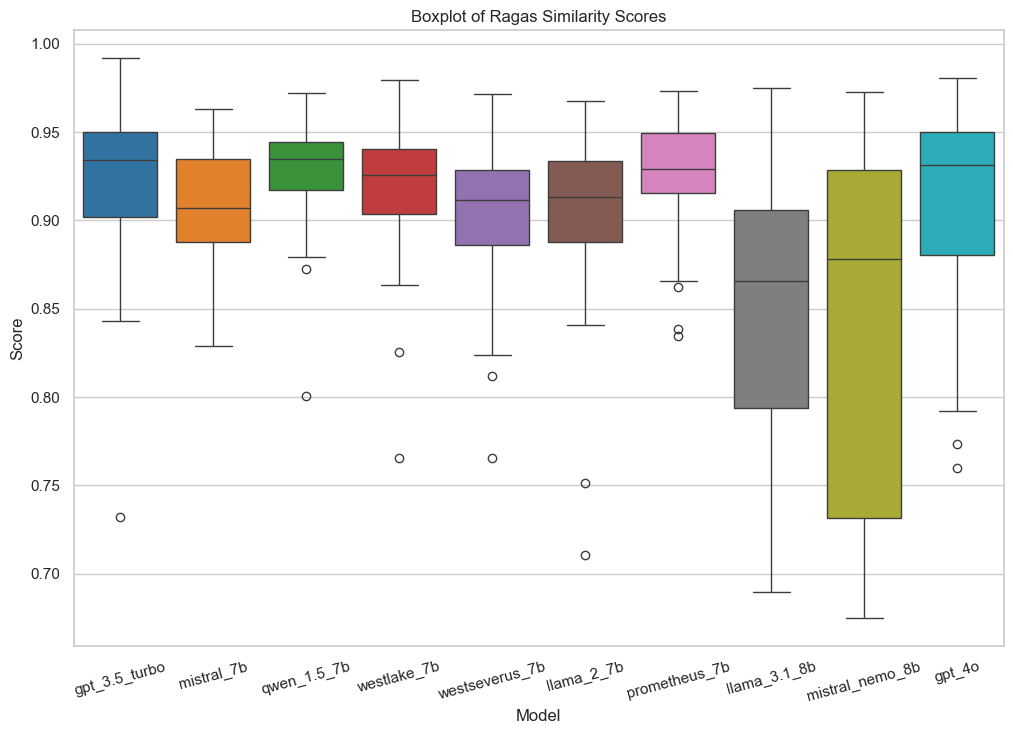

In [155]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='Model', var_name='Experiment', value_name='Score')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")
plt.xticks(rotation=15)
plt.title('Boxplot of Ragas Similarity Scores')
plt.show()


In [156]:
bert_df_file_path = '/Users/shaswatamitra/Desktop/Files/Work/Projects/github/Contextual_CTI/data/Bert_Result_final_individual_point_LocalIntel.csv'

In [157]:
bert_df = pd.read_csv(bert_df_file_path)

In [158]:
bert_df.head()

,model,data_index,rouge1_precision,rouge1_recall,rouge1_f1,rouge2_precision,rouge2_recall,rouge2_f1,rougel_precision,rougel_recall,rougel_f1,bert_precision,bert_recall,bert_f1
0,gpt_35_completion,0,0.452381,0.253333,0.324786,0.170732,0.094595,0.121739,0.333333,0.186667,0.239316,0.534186,0.656569,0.589089
1,gpt_35_completion,1,0.551724,0.551724,0.551724,0.245614,0.245614,0.245614,0.293103,0.293103,0.293103,0.738759,0.755777,0.747171
2,gpt_35_completion,2,0.395604,0.642857,0.489796,0.200000,0.327273,0.248276,0.230769,0.375000,0.285714,0.750260,0.640572,0.691091
3,gpt_35_completion,3,0.446809,0.552632,0.494118,0.152174,0.189189,0.168675,0.255319,0.315789,0.282353,0.658749,0.652518,0.655618
4,gpt_35_completion,4,0.528302,0.388889,0.448000,0.269231,0.197183,0.227642,0.396226,0.291667,0.336000,0.695006,0.719776,0.707174


In [163]:
score_list = list(bert_df['bert_f1'])

In [167]:
seaborn.set(style='whitegrid')
# Data
data = {
    'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 
              'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 
              'mistral_nemo_8b', 'gpt_4o'],
}
size = 58
for i in range(size):
    val = []
    for j in range(10):
        val.append(score_list[j*58+i])
    data[str(i)] = val

print(data)

{'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 'mistral_nemo_8b', 'gpt_4o'], '0': [0.5890886783599854, 0.6406316161155701, 0.6813664436340332, 0.6091745495796204, 0.5562624931335449, 0.7317883968353271, 0.6769899725914001, 0.6861099004745483, 0.7094942927360535, 0.6871912479400635], '1': [0.7471710443496704, 0.5811171531677246, 0.6884756684303284, 0.6339784860610962, 0.6670710444450378, 0.6843351721763611, 0.6463498473167419, 0.5672839879989624, 0.7211148142814636, 0.6882107853889465], '2': [0.6910910606384277, 0.657906174659729, 0.5664881467819214, 0.6620640158653259, 0.5948815941810608, 0.5625690817832947, 0.6011650562286377, 0.3563187420368194, 0.5527699589729309, 0.6800363063812256], '3': [0.6556184887886047, 0.6955841183662415, 0.6652169227600098, 0.7744784951210022, 0.756812572479248, 0.7673445343971252, 0.7113122344017029, 0.7196250557899475, 0.7416902780532837, 0.7033957242965698], '4': [0

/var/folders/p6/53ncl4y93sl459m6vl47ml4c0000gn/T/ipykernel_19340/3491596149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")


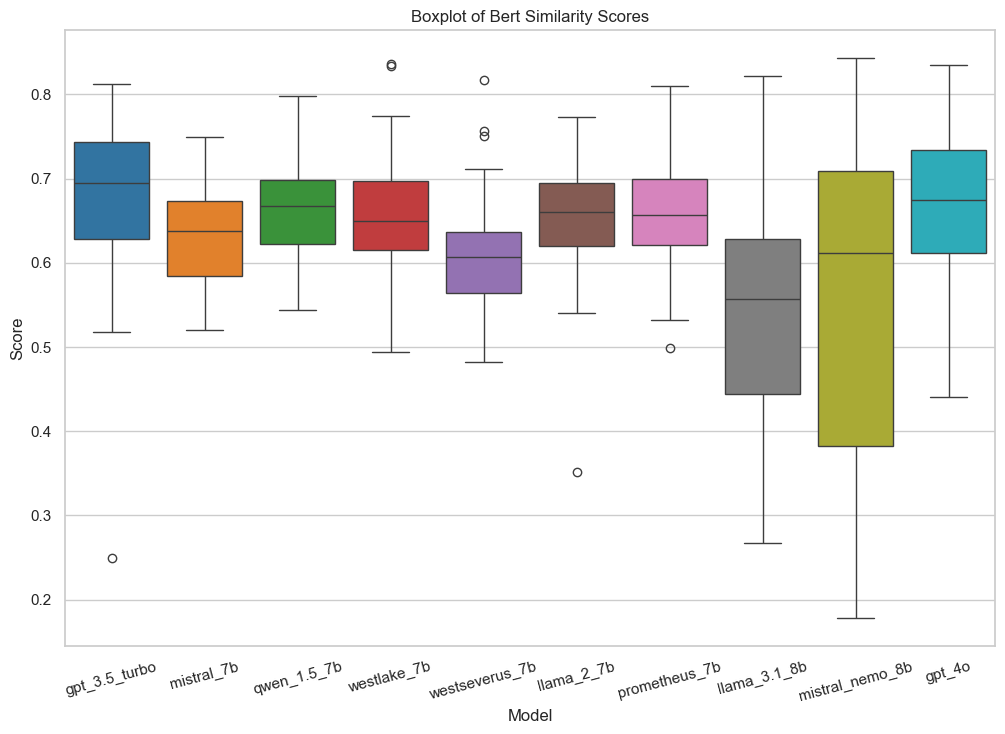

In [168]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='Model', var_name='Experiment', value_name='Score')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")
plt.xticks(rotation=15)
plt.title('Boxplot of Bert Similarity Scores')
plt.show()

In [169]:
geval_file_path = '/Users/shaswatamitra/Desktop/Files/Work/Projects/github/Contextual_CTI/data/geval_dataset.csv'

In [170]:
geval_df = pd.read_csv(geval_file_path)

In [171]:
geval_df.head()

,Unnamed: 0,Questions,Global_Knowledge,Local_knowledge,Ground_truth,gpt_35_completion,mistral_7b_completion,qwen_7b_completion,westlake_7b_completion,westseverus_7b_completion,...,gpt_35_turbo_geval_score,mistral_7b_geval_score,qwen_7b_geval_score,westlake_7b_geval_score,westseverus_7b_geval_score,llama_7b_geval_score,prometheus_7b_geval_score,mistral_nemo_minitron_8b_geval_score,llama_31_8b_geval_score,gpt_4o_geval_score
0,0,Considering the use of LangChain's chains for ...,An issue in Harrison Chase langchain v.0.0.194...,Chatbot Wiki Document:\n\nThe application's da...,The vulnerability in LangChain version 0.0.194...,The global_knowledge and local_knowledge do no...,The information provided indicates a vulnerabi...,The LangChain chains used in the chatbot appli...,The global_knowledge provides information abou...,"Given the global_knowledge, a vulnerability ex...",...,0.226071,0.559045,0.929008,0.429661,0.296554,0.862805,0.621541,0.910926,0.254495,0.814801
1,1,How critical is the langchain vulnerability in...,An issue in Harrison Chase langchain v.0.0.194...,Chatbot Wiki Document:\n\nThe application's da...,This LangChain vulnerability is critical due t...,The langchain vulnerability is highly critical...,"From the global_knowledge provided, a remote a...",The langchain vulnerability in Harrison Chase ...,The given threat or vulnerability report highl...,The given threat in Harrison Chase langchain e...,...,0.954702,0.802816,0.916704,0.800226,0.808165,0.900000,0.760307,0.951415,0.840493,0.935739
2,2,What potential consequences could arise from t...,"Streamlit, software for turning data scripts i...",Chatbot Wiki Document:\n\nStreamlit == 0.63.0\...,Users of hosted Streamlit app(s) are vulnerabl...,If the XSS vulnerability in Streamlit version ...,An attacker could inject malicious scripts int...,The potential consequences from the exploitati...,In the exploitation of the XSS vulnerability i...,"In the given context, the chatbot application ...",...,0.877036,0.895378,0.874970,0.860480,0.724834,0.844910,0.855937,0.920955,0.068795,0.885380
3,3,What actions can an attacker take advantage of...,"Streamlit, software for turning data scripts i...",Chatbot Wiki Document:\n\nStreamlit == 0.63.0\...,Through the exploitation of the vulnerability ...,An attacker could trick a user into visiting a...,An attacker could create a malicious URL with ...,An attacker could exploit the cross-site scrip...,An attacker can take advantage of the vulnerab...,"An attacker, leveraging the cross-site scripti...",...,0.754839,0.879321,0.846917,0.827468,0.826586,0.799411,0.884071,0.740630,0.812006,0.806044
4,4,How does the vulnerability in Docker Desktop p...,Docker Desktop before 4.12.0 is vulnerable to ...,Chatbot Wiki Document:\n\nDocker == 3.1\n\nDoc...,The vulnerability in Docker Desktop before ver...,The vulnerability in Docker Desktop potentiall...,Given the information provided in global_knowl...,The vulnerability in Docker Desktop before 4.1...,The given vulnerability in Docker Desktop befo...,The vulnerability in Docker Desktop before 4.1...,...,0.660392,0.375635,0.859276,0.763607,0.753534,0.892276,0.839962,0.865643,0.195790,0.911675


In [172]:
geval_df.columns

Index(['Unnamed: 0', 'Questions', 'Global_Knowledge', 'Local_knowledge',
       'Ground_truth', 'gpt_35_completion', 'mistral_7b_completion',
       'qwen_7b_completion', 'westlake_7b_completion',
       'westseverus_7b_completion', 'llama_7b_completions',
       'prometheus_7b_completions', 'llama_31_8b_completions',
       'mistral_nemo_minitron_8b_completions', 'gpt_4o_completions', 'context',
       'gpt_35_turbo_geval_score', 'mistral_7b_geval_score',
       'qwen_7b_geval_score', 'westlake_7b_geval_score',
       'westseverus_7b_geval_score', 'llama_7b_geval_score',
       'prometheus_7b_geval_score', 'mistral_nemo_minitron_8b_geval_score',
       'llama_31_8b_geval_score', 'gpt_4o_geval_score'],
      dtype='object')

In [173]:
geval_df = geval_df[['gpt_35_turbo_geval_score', 'mistral_7b_geval_score', 'qwen_7b_geval_score', 'westlake_7b_geval_score', 'westseverus_7b_geval_score', 'llama_7b_geval_score', 'prometheus_7b_geval_score', 'llama_31_8b_geval_score', 'mistral_nemo_minitron_8b_geval_score', 'gpt_4o_geval_score']]

In [176]:
geval_df.head()

,gpt_35_turbo_geval_score,mistral_7b_geval_score,qwen_7b_geval_score,westlake_7b_geval_score,westseverus_7b_geval_score,llama_7b_geval_score,prometheus_7b_geval_score,llama_31_8b_geval_score,mistral_nemo_minitron_8b_geval_score,gpt_4o_geval_score
0,0.226071,0.559045,0.929008,0.429661,0.296554,0.862805,0.621541,0.254495,0.910926,0.814801
1,0.954702,0.802816,0.916704,0.800226,0.808165,0.900000,0.760307,0.840493,0.951415,0.935739
2,0.877036,0.895378,0.874970,0.860480,0.724834,0.844910,0.855937,0.068795,0.920955,0.885380
3,0.754839,0.879321,0.846917,0.827468,0.826586,0.799411,0.884071,0.812006,0.740630,0.806044
4,0.660392,0.375635,0.859276,0.763607,0.753534,0.892276,0.839962,0.195790,0.865643,0.911675


In [179]:
seaborn.set(style='whitegrid')
# Data
data = {
    'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 
              'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 
              'mistral_nemo_8b', 'gpt_4o'],
}
size = len(geval_df['gpt_35_turbo_geval_score'])
for i in range(size):
    data[str(i)] = list(geval_df.iloc[i])

print(data)

{'Model': ['gpt_3.5_turbo', 'mistral_7b', 'qwen_1.5_7b', 'westlake_7b', 'westseverus_7b', 'llama_2_7b', 'prometheus_7b', 'llama_3.1_8b', 'mistral_nemo_8b', 'gpt_4o'], '0': [0.2260712620156544, 0.5590452819068855, 0.9290080113757976, 0.4296612826183142, 0.296554417490178, 0.8628054042657878, 0.6215410129408476, 0.254495229507737, 0.9109259168910138, 0.8148011639034898], '1': [0.954701852612266, 0.8028160349530165, 0.9167043912177169, 0.800225981724106, 0.8081649537806364, 0.9, 0.7603074689080972, 0.8404931580034413, 0.951415386563352, 0.935739388376046], '2': [0.8770357874876542, 0.8953780049305384, 0.8749695693340346, 0.8604795006340258, 0.7248337362772841, 0.8449102220715947, 0.8559368343649659, 0.0687953769386543, 0.9209547322864992, 0.8853801314525704], '3': [0.7548394919035487, 0.8793214551961436, 0.8469166362589136, 0.8274682126254926, 0.8265864546046389, 0.7994110244008853, 0.8840707842758679, 0.8120063527171579, 0.740630360367928, 0.806044331791742], '4': [0.6603916721848452, 0.

/var/folders/p6/53ncl4y93sl459m6vl47ml4c0000gn/T/ipykernel_19340/1194889523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")


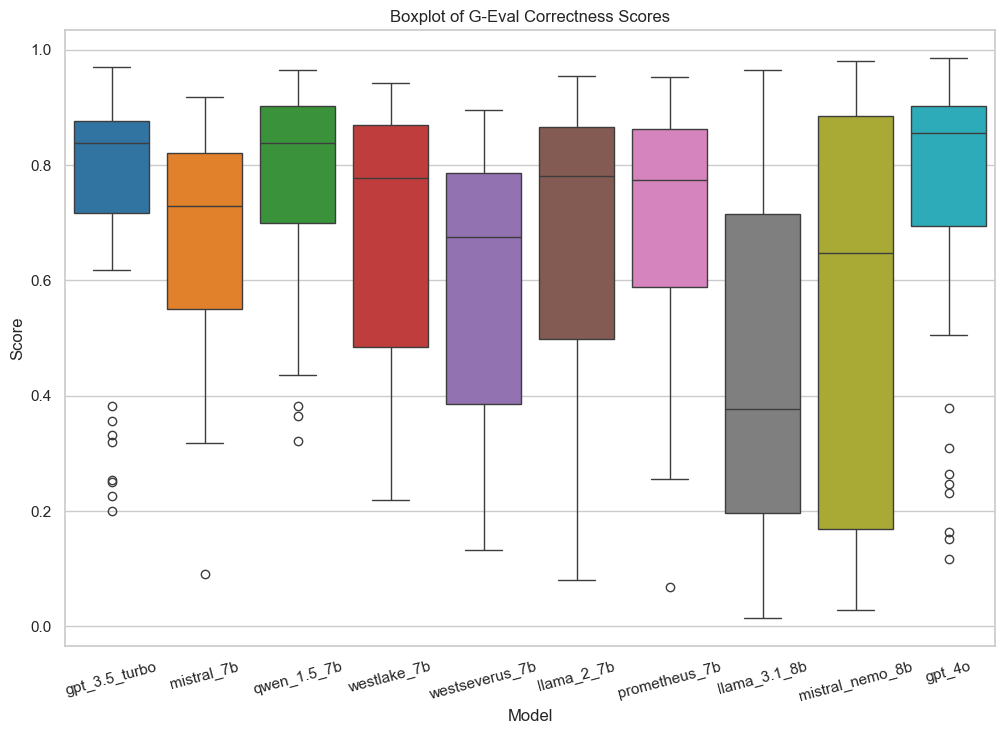

In [181]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='Model', var_name='Experiment', value_name='Score')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Score', data=df_melted, palette="tab10")
plt.xticks(rotation=15)
plt.title('Boxplot of G-Eval Correctness Scores')
plt.show()
